In [1]:
pwd

'/Users/batesje/Desktop/cms-workshop'

In [4]:
import os

ethanol_file = os.path.join('outfiles', 'ethanol.out')
print(ethanol_file)

outfiles/ethanol.out


In [5]:
outfile = open(ethanol_file, 'r')

In [6]:
data = outfile.readlines()

In [8]:
outfile.close()

In [10]:
print(len(data))

270


In [11]:
for line in data:
    print(line)



    -----------------------------------------------------------------------

          Psi4: An Open-Source Ab Initio Electronic Structure Package

                               Psi4 1.1 release



                         Git: Rev {HEAD} add49b9 





    R. M. Parrish, L. A. Burns, D. G. A. Smith, A. C. Simmonett,

    A. E. DePrince III, E. G. Hohenstein, U. Bozkaya, A. Yu. Sokolov,

    R. Di Remigio, R. M. Richard, J. F. Gonthier, A. M. James,

    H. R. McAlexander, A. Kumar, M. Saitow, X. Wang, B. P. Pritchard,

    P. Verma, H. F. Schaefer III, K. Patkowski, R. A. King, E. F. Valeev,

    F. A. Evangelista, J. M. Turney, T. D. Crawford, and C. D. Sherrill,

    J. Chem. Theory Comput. in press (2017).

    (doi: 10.1021/acs.jctc.7b00174)



    -----------------------------------------------------------------------





    Psi4 started on: Tuesday, 27 June 2017 12:10PM



    Process ID:  10591

    PSIDATADIR: /Users/armcdona/psi4conda/share/psi4

    Memory:     500.0 MiB

In [13]:
for line in data:
    if 'Final Energy' in line:
        energy_line = line
        print(line)

  @DF-RHF Final Energy:  -154.09130176573018



In [14]:
energy_line.split(":")

['  @DF-RHF Final Energy', '  -154.09130176573018\n']

In [17]:
words = energy_line.split()

In [18]:
energy = float(words[3])

In [19]:
energy+50

-104.09130176573018

In [20]:
for linenum, line in enumerate(data):
    if 'Center' in line:
        print(linenum)
        print(line)

77
       Center              X                  Y                   Z               Mass       



In [23]:
print(''.join(data[77:82]))

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
           H          0.278612764252     1.265047047666    -1.274211449480     1.007825032070
           C          0.253854764252     1.255132047666    -0.179502449480    12.000000000000
           H          1.294208764252     1.265046047666     0.162059550520     1.007825032070



### Second Section : Parsing multiple files

In [24]:
file_location = os.path.join('outfiles','*.out')

In [25]:
import glob
filenames = glob.glob(file_location)
print(filenames)

['outfiles/propanol.out', 'outfiles/pentanol.out', 'outfiles/decanol.out', 'outfiles/methanol.out', 'outfiles/octanol.out', 'outfiles/ethanol.out', 'outfiles/hexanol.out', 'outfiles/heptanol.out', 'outfiles/butanol.out', 'outfiles/nonanol.out']


In [28]:
for f in filenames:
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = line.split()
            print(f,float(words[3]))

outfiles/propanol.out -193.12836249728798
outfiles/pentanol.out -271.20138119895074
outfiles/decanol.out -466.3836241400086
outfiles/methanol.out -115.04800861868374
outfiles/octanol.out -388.3110864554743
outfiles/ethanol.out -154.09130176573018
outfiles/hexanol.out -310.2385332251633
outfiles/heptanol.out -349.27397687072676
outfiles/butanol.out -232.1655798347283
outfiles/nonanol.out -427.3465180082815


In [32]:
molecule_name = os.path.basename(filenames[0]).split('.')[0]

In [33]:
for f in filenames:
    # open the file
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    # get the molecule name
    molecule_name = os.path.basename(f).split('.')[0]
    for line in data:
        # isolate the energies and print them out
        if 'Final Energy' in line:
            energy_line = line
            words = line.split()
            print(molecule_name,float(words[3]))

propanol -193.12836249728798
pentanol -271.20138119895074
decanol -466.3836241400086
methanol -115.04800861868374
octanol -388.3110864554743
ethanol -154.09130176573018
hexanol -310.2385332251633
heptanol -349.27397687072676
butanol -232.1655798347283
nonanol -427.3465180082815


In [35]:
datafile = open('energies.txt', 'w+') # the output file with energies
for f in filenames:
    # open the file
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    # get the molecule name
    molecule_name = os.path.basename(f).split('.')[0]
    for line in data:
        # isolate the energies and print them out
        if 'Final Energy' in line:
            energy_line = line
            words = line.split()
            print(molecule_name,float(words[3]))
            datafile.write(F'{molecule_name} {float(words[3]):.6f}\n')
datafile.close()

propanol -193.12836249728798
pentanol -271.20138119895074
decanol -466.3836241400086
methanol -115.04800861868374
octanol -388.3110864554743
ethanol -154.09130176573018
hexanol -310.2385332251633
heptanol -349.27397687072676
butanol -232.1655798347283
nonanol -427.3465180082815


In [39]:
import numpy

distance_file = os.path.join('', 'distance_data_headers.csv')

distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [40]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [42]:
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [43]:
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [44]:
import matplotlib.pyplot as plt

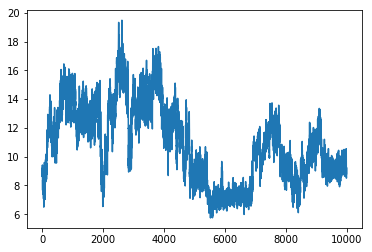

In [45]:
plt.figure()
plt.plot(data[:,1])

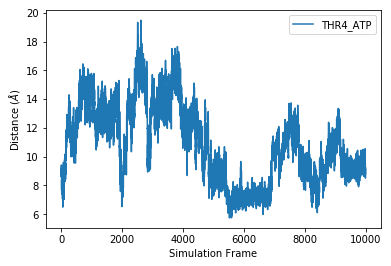

In [50]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel("Distance ($\AA$)")

fig_1 = plt.plot(data[:,1], label=headers[1])
plt.legend()

plt.savefig(F'{headers[1]}.png', dpi=300)

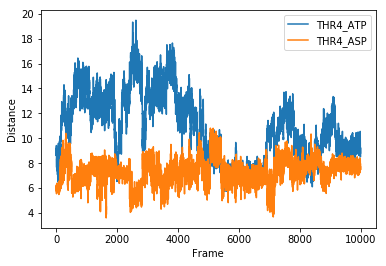

In [53]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()

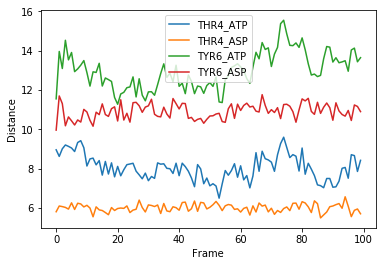

In [57]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance')
#for head, col in zip(headers, data[:,1]):
#    plt.plot(col, label=head)
for col in range(1, len(data[0,:])):
    plt.plot(data[:100,col], label=headers[col])
plt.legend()